In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Selected models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
df = pd.read_csv('tested.csv')

In [2]:
def load_and_preprocess():
    """Load and clean data with improved handling"""
    df = pd.read_csv('tested.csv')
    
    # Handle missing values without inplace
    df = df.assign(
        Age = df['Age'].fillna(df['Age'].median()),
        Fare = df['Fare'].fillna(df['Fare'].median()),
        Cabin = df['Cabin'].fillna('Unknown').astype(str).str[0]
    )
    
    # Feature engineering
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
    
    # Efficient categorical encoding
    le = LabelEncoder()
    categorical_cols = ['Sex', 'Embarked', 'Cabin']
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col].astype(str))
    
    return df

titanic_df = load_and_preprocess()
print("Processed Data Sample:")
display(titanic_df[['Pclass', 'Sex', 'Age', 'Fare', 'Survived']].head(3))

Processed Data Sample:


,Pclass,Sex,Age,Fare,Survived
0,3,1,34.5,7.8292,0
1,3,0,47.0,7.0000,1
2,2,1,62.0,9.6875,0


In [3]:
# Preview the dataset
print(df.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


In [4]:
# Statistical summary of numerical features
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  332.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   14.181209    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   21.000000    0.000000   
50%    1100.500000    0.000000    3.000000   27.000000    0.000000   
75%    1204.750000    1.000000    3.000000   39.000000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  417.000000  
mean     0.392344   35.627188  
std      0.981429   55.907576  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.500000  
max      9.000000  512.329200  


In [5]:
# Summarize missing values by feature
print(df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [6]:
# 3. Exploratory Data Analysis
# Set visual style
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0, 0.5, 'Count')

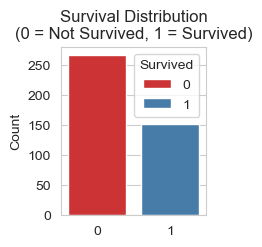

In [7]:
# Survival distribution
plt.subplot(2, 3, 1)
sns.countplot(x='Survived', data=titanic_df, palette='Set1',hue='Survived')
plt.title('Survival Distribution\n(0 = Not Survived, 1 = Survived)')
plt.xlabel('')
plt.ylabel('Count')

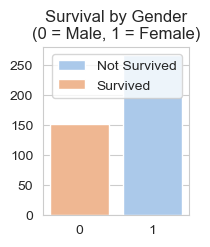

In [8]:
# Gender survival
plt.subplot(2, 3, 2)
sns.countplot(x='Sex', hue='Survived', data=titanic_df, palette='pastel')
plt.title('Survival by Gender\n(0 = Male, 1 = Female)')
plt.xlabel('')
plt.ylabel('')
plt.legend(['Not Survived', 'Survived'])

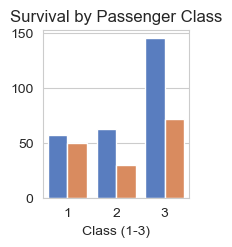

In [9]:

# Class survival
plt.subplot(2, 3, 3)
sns.countplot(x='Pclass', hue='Survived', data=titanic_df, palette='muted')
plt.title('Survival by Passenger Class')
plt.xlabel('Class (1-3)')
plt.ylabel('')
plt.legend().remove()

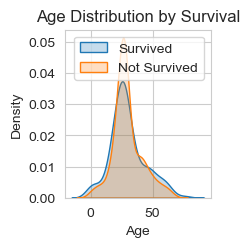

In [10]:
# Age distribution
plt.subplot(2, 3, 4)
sns.kdeplot(titanic_df[titanic_df['Survived'] == 1]['Age'], 
            label='Survived', fill=True)
sns.kdeplot(titanic_df[titanic_df['Survived'] == 0]['Age'], 
            label='Not Survived', fill=True)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()

([<matplotlib.axis.XTick at 0x251deebf050>,
 [Text(0, 0, 'Not Survived'), Text(1, 0, 'Survived')])

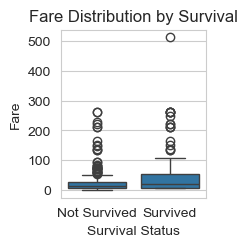

In [11]:
# Fare analysis
plt.subplot(2, 3, 5)
sns.boxplot(x='Survived', y='Fare', data=titanic_df)
plt.title('Fare Distribution by Survival')
plt.xlabel('Survival Status')
plt.ylabel('Fare')
plt.xticks([0, 1], ['Not Survived', 'Survived'])

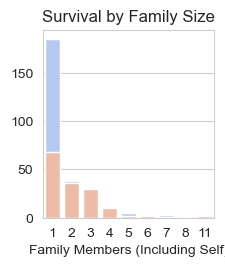

In [12]:
# Family size impact
plt.subplot(2, 3, 6)
sns.countplot(x='FamilySize', hue='Survived', data=titanic_df, 
              palette='coolwarm', dodge=False)
plt.title('Survival by Family Size')
plt.xlabel('Family Members (Including Self)')
plt.ylabel('')
plt.legend().remove()

plt.tight_layout()
plt.show()

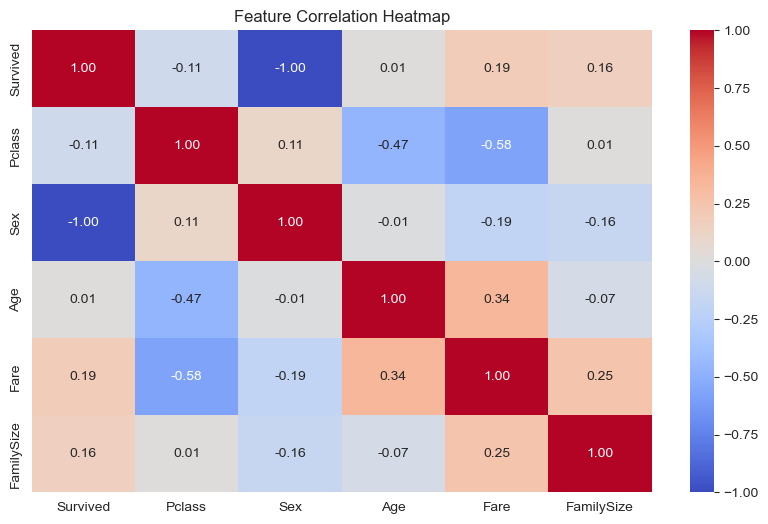

In [13]:

# Correlation heatmap
plt.figure(figsize=(10, 6))
corr_matrix = titanic_df[['Survived', 'Pclass', 'Sex', 'Age', 
                         'Fare', 'FamilySize']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

In [14]:
# Selected features based on domain knowledge
features = ['Pclass', 'Sex', 'Age', 'Fare', 'IsAlone']
target = 'Survived'

In [15]:
 # 4. Feature Selection & Scaling
# Show basic dataset information
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [16]:
X = titanic_df[features]
y = titanic_df[target]

In [17]:
# Stratified split for class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y
)

In [18]:
# Scale features for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
 # 5. Initialize Core Models
models = {
    'Random Forest': RandomForestClassifier(
        n_estimators=100,
        max_depth=5,
        random_state=42
    ),
    'Logistic Regression': LogisticRegression(
        max_iter=1000,
        solver='liblinear'
    ),
    'Support Vector Machine': SVC(
        probability=True,
        kernel='rbf'
    )
}

In [20]:
titanic_df = titanic_df.drop(['Name', 'Ticket'], axis=1)


In [21]:

# 6. Model Training & Evaluation
from sklearn.metrics import classification_report
def train_and_evaluate(models, X_train, X_test, y_train, y_test):
    """Train models and return metrics"""
    results = {}
    
    for name, model in models.items():
        # Train model
        model.fit(X_train, y_train)
        
        # Generate predictions
        y_pred = model.predict(X_test)
        
        # Store results
        results[name] = {
            'accuracy': accuracy_score(y_test, y_pred),
            'confusion_matrix': confusion_matrix(y_test, y_pred),
            'model': model
        }
        
        print(f"\n{name} Performance:")
        print(f"Accuracy: {results[name]['accuracy']:.3f}")
        print(classification_report(y_test, y_pred))
    
    return results

model_results = train_and_evaluate(models, X_train_scaled, X_test_scaled, y_train, y_test)


Random Forest Performance:
Accuracy: 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        31

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84


Logistic Regression Performance:
Accuracy: 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        31

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84


Support Vector Machine Performance:
Accuracy: 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        31

    accuracy                       

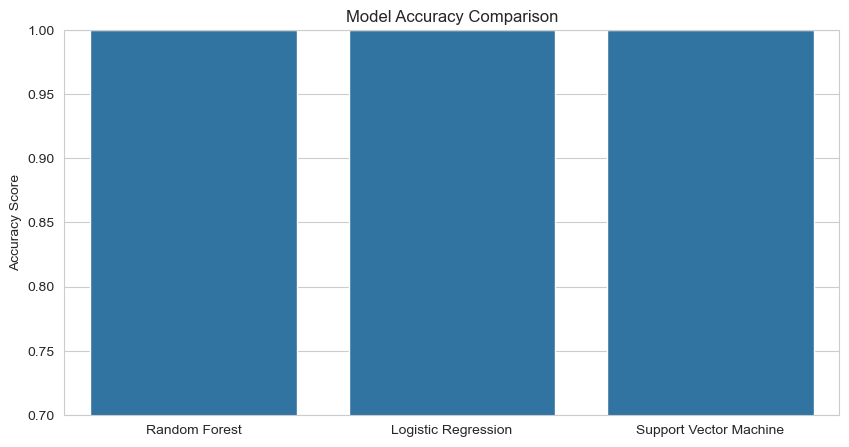

In [22]:
# 7. Performance Visualization
# Accuracy comparison
plt.figure(figsize=(10, 5))
sns.barplot(
    x=list(model_results.keys()),
    y=[res['accuracy'] for res in model_results.values()])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy Score')
plt.ylim(0.7, 1.0)
plt.show()

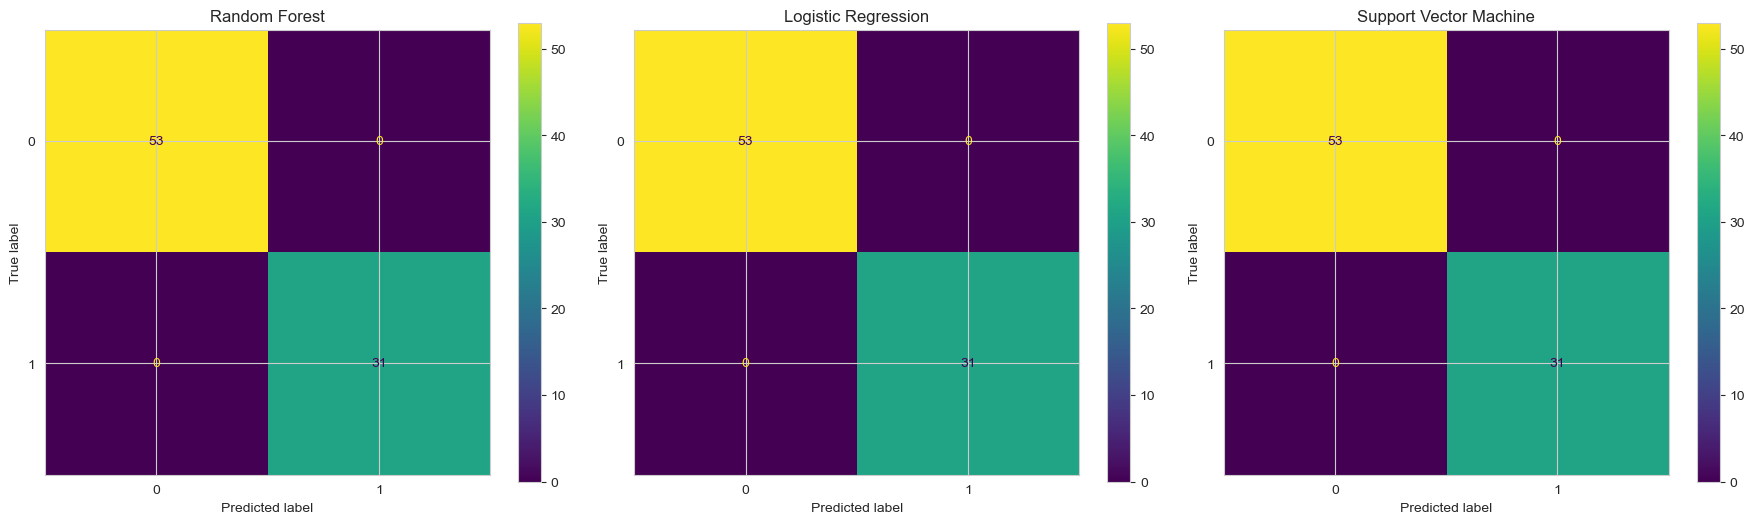

In [23]:
# Confusion matrices
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
for idx, (name, res) in enumerate(model_results.items()):
    ConfusionMatrixDisplay(res['confusion_matrix']).plot(ax=ax[idx])
    ax[idx].set_title(name)
plt.tight_layout()
plt.show()

In [24]:
# 8. Prediction Function
def predict_survival():
    """Interactive prediction with input validation"""
    print("Available Models:")
    model_list = list(models.keys())
    for i, name in enumerate(model_list, 1):
        print(f"{i}. {name}")
    
    try:
        choice = int(input("\nSelect model (1-3): ")) - 1
        selected_model = model_list[choice]
        
        print(f"\nSelected: {selected_model}")
        print("Enter passenger details:")
        
        # Collect input with validation
        details = {
            'Pclass': int(input("Class (1-3): ")),
            'Sex': int(input("Sex (0=Female, 1=Male): ")),
            'Age': float(input("Age: ")),
            'Fare': float(input("Fare: ")),
            'IsAlone': int(input("Alone? (0/1): "))
        }
        
        # Create input array
        input_data = pd.DataFrame([details], columns=features)
        scaled_input = scaler.transform(input_data)
        
        # Make prediction
        model = model_results[selected_model]['model']
        pred = model.predict(scaled_input)[0]
        proba = model.predict_proba(scaled_input)[0][1]
        
        print("\nPrediction Result:")
        print(f"Outcome: {'Survived' if pred == 1 else 'Did Not Survive'}")
        print(f"Confidence: {proba:.1%}")
        
    except Exception as e:
        print(f"\nError: {str(e)}\nPlease check your inputs")

In [25]:
predict_survival()

Available Models:
1. Random Forest
2. Logistic Regression
3. Support Vector Machine



Select model (1-3):  1



Selected: Random Forest
Enter passenger details:


Class (1-3):  1
Sex (0=Female, 1=Male):  0
Age:  34
Fare:  150
Alone? (0/1):  0



Prediction Result:
Outcome: Survived
Confidence: 96.1%
